IMPORT STATEMENTS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap

from sklearn.metrics import classification_report

IMPORT DATASET

In [2]:
datasets = pd.read_csv('Social_Network_Ads.csv')
datasets.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [3]:
datasets.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
X_ref = datasets.iloc[:,[2,3]].head()

In [5]:
Y_ref = datasets.iloc[:,4].head(10)

In [6]:
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values

In [7]:
#Splitting the dataset into testing and training datasets
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

In [8]:
pd.DataFrame(X_Train).describe()

,0,1
count,300.000000,300.000000
mean,38.126667,69583.333333
std,10.114592,34548.541619
min,18.000000,15000.000000
25%,30.750000,43000.000000
50%,38.000000,69500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [9]:
print('X_Train',X_Train.shape,'\n'+ 'X_Test',X_Test.shape)
print('Y_Train',Y_Train.shape,'\n'+ 'Y_Test',Y_Test.shape)    

X_Train (300, 2) 
X_Test (100, 2)
Y_Train (300,) 
Y_Test (100,)


Featurre scaling

In [10]:
sc_X = StandardScaler()

In [11]:
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
pd.DataFrame(X_Train).describe()

,0,1
count,3.000000e+02,3.000000e+02
mean,1.458093e-16,1.509903e-16
std,1.001671e+00,1.001671e+00
min,-1.993189e+00,-1.582542e+00
25%,-7.305279e-01,-7.707344e-01
50%,-1.254409e-02,-2.416095e-03
75%,7.797139e-01,5.339571e-01
max,2.166165e+00,2.331532e+00


In [13]:
pd.DataFrame(X_Test).describe()

,0,1
count,100.000000,100.000000
mean,-0.186841,0.018459
std,1.134404,0.952995
min,-1.993189,-1.582542
25%,-1.101899,-0.654762
50%,-0.309641,0.084563
75%,0.532133,0.504964
max,2.166165,2.331532


FITTING THE CLASSIFIER INTO THE TRAINING SET

In [14]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_Train,Y_Train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

---------------------------------------

PREDICTING THE TEST SET RESULTS

In [15]:
Y_Pred = classifier.predict(X_Test)

----

MAKING CONFUSION MATRIX

In [16]:
cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)


[[62  6]
 [ 3 29]]


In [17]:
X_Set, Y_Set = X_Test, Y_Test

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


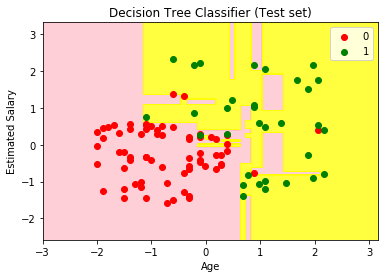

In [20]:
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))


plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [19]:
print(classification_report(Y_Test,Y_Pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

   micro avg       0.91      0.91      0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100

